# TITANIC SURVIVAL PREDICTION

Packeges used



### EDA:
  


    


    


  PANDAS,
    NUMPY

## VISUALS:

MATPLOTLIB,
SEABORN

### MODELS AND ALGORITHMS USED:


 1. LOGISTIC REGRESION,
 2.  K-NEAREST NEIGHBOUR,
 3.  DECISION TREE

Steps followed

1. Data Reading
2. Data Cleaning
3. Visualising Data
4. Understanding The Data
5. Training Models on the Data

NB:
    0 : FEMALE     1: MALE
0:  DID NOT SURVIVE   1: SURVIVOR

Importing Libraries

In [478]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Data

In [479]:
df = pd.read_csv("titanic.csv")

In [480]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## EDA

In [481]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [482]:
df.shape

(891, 12)

In [483]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

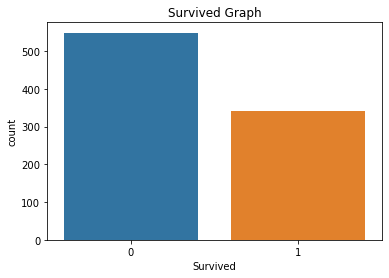

In [484]:
sns.countplot('Survived',data=df)
plt.title("Survived Graph")
plt.show()

here 0 means did not survived and 1 means survived It can be clearly seen Mostly people did not survive the sink

In [485]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

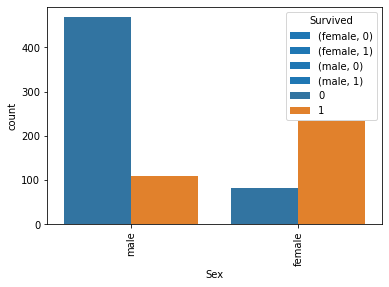

In [486]:
df.groupby(['Sex','Survived'])['Survived'].plot.bar()
sns.countplot('Sex',hue='Survived', data = df)
plt.show()


So it can be seen that more males did not survive the sink compared to females.

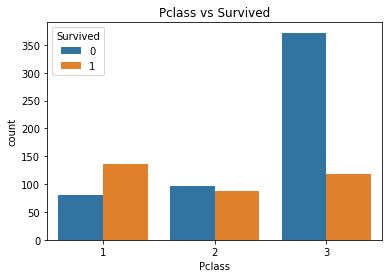

In [487]:
sns.countplot('Pclass',hue='Survived', data=df)
plt.title('Pclass vs Survived')
plt.show()

Mostly 3st class passengers did not survived followed by 2nd class and then 1st class. So we can deduce st class passengers were given the most priority during evacuation

In [488]:
pd.crosstab([df.Sex,df.Survived], df.Pclass,margins =True).style.background_gradient(cmap='summer_r')

this is a crosstab between Gender Survival and the clas they belonged to

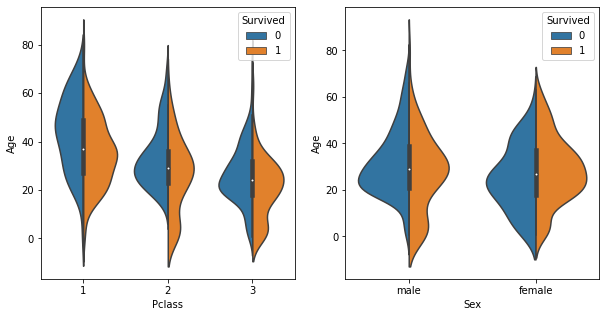

In [489]:
f,ax=plt.subplots(1,2, figsize=(10,5))
sns.violinplot('Pclass', 'Age',hue='Survived', data=df,split=True,ax=ax[0])
sns.violinplot('Sex', 'Age',hue='Survived', data=df,split=True,ax=ax[1])
plt.show()


This violin plot is a comparison between the survival of classes along with the gender

In [490]:
df. columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [491]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

So we ca see there are many type of initials MR. Mrs. Cols. we change it to just thre Mr. Mrs. Miss and others. That is to make us undestand the data better

In [492]:
df['initial']=0
for i in df.Name:
    df['initial']=df.Name.str.extract('([A-Za-z]+)\.')

In [493]:
df['initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: initial, Length: 891, dtype: object

In [494]:
df["initial"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

So there are this many Initials present in  the dataset which makes the interpretation of the data a bit tough

In [495]:
pd.crosstab(df.initial,df.Sex).T.style.background_gradient(cmap="Pastel1")

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Now we will replace the initials with our given initials using the replace function

In [496]:
df['initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Master','Miss','Mlle','Mme','Mr','Mrs','Ms','Rev','Sir'],['Mr','Mr','Mrs','Mr','Mr','Other','Mrs','Mr','Master','Miss','Mrs','Mrs','Mr','Mrs','Mrs','Other','Mr'],inplace=True)

In [497]:
df["initial"].unique()   #succesfully replaced

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [498]:
df.groupby('initial')['Age'].mean()

initial
Master     4.574167
Miss      21.773973
Mr        32.862530
Mrs       35.596491
Other     42.428571
Name: Age, dtype: float64

Master is basically child and teens so their mean age lie between 4.5 wich is aprrox 5 years. Miss has a mean of 22 . Mr. has a mean of 33 and Mrs has a 35 so we will replace the values where age is missing with a mean

In [499]:
df.Age.isnull().any()

True

There are null values present in the Age column

In [500]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
initial          0
dtype: int64

In [501]:
df.loc[(df.Age.isnull())&(df.initial=='Mr'),'Age']=33

df.loc[(df.Age.isnull())&(df.initial=='Mrs'),'Age']=35

df.loc[(df.Age.isnull())&(df.initial=='Master'),'Age']=5

df.loc[(df.Age.isnull())&(df.initial=='Miss'),'Age']=22

df.loc[(df.Age.isnull())&(df.initial=='Other'),'Age']=45

We are replacing the age and initials with the mean ages wherever null values are present

In [502]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
initial          0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

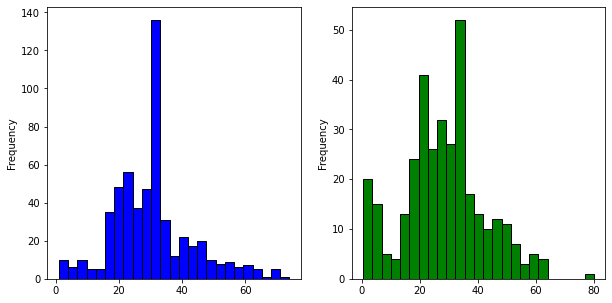

In [503]:
f,ax=plt.subplots(1,2,figsize=(10,5))

df[df['Survived']==0].Age.plot.hist(ax=ax[0], bins=25, edgecolor='black', color='blue')

df[df['Survived']==1].Age.plot.hist(ax=ax[1], bins=25, edgecolor='black', color='green')

We can see the age group between  30-40 did not survive and on te other hand 20-40 age group has survived the most too. This deduces that we had most passengers in tbetween age group 20-40

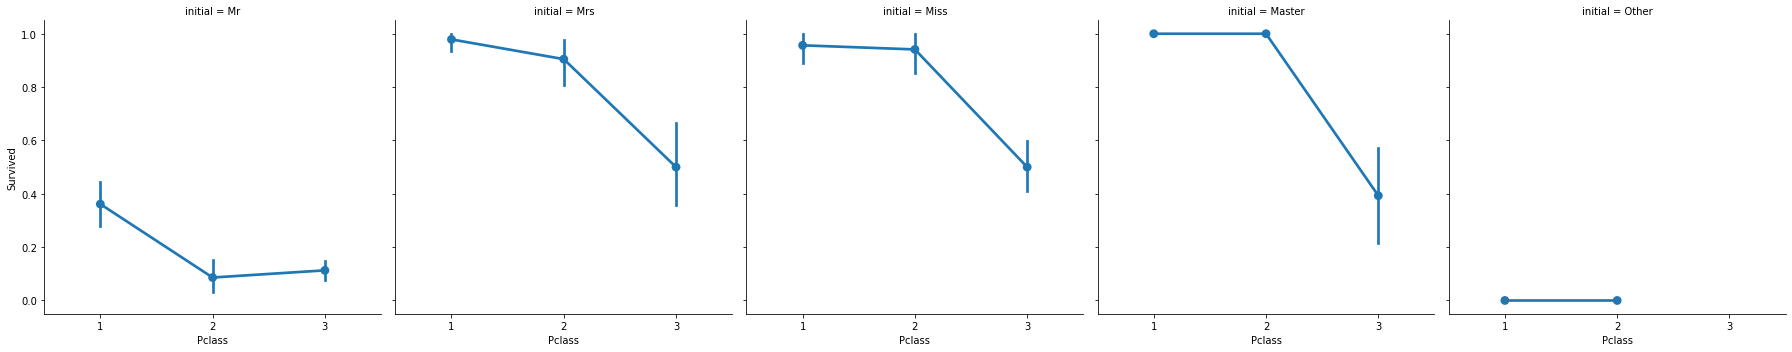

In [504]:
sns.factorplot('Pclass','Survived',col='initial',data=df)
plt.show()

Mr from 1st class survived the most same for mrs and miss and master. This shows 1st class was the luckiest one or priotized more wehereas 3rd class was not

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  initial      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


So now our dataset is free of any null values

Now let us see where from passengers embarked on their journey on titanic

In [506]:
df["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [507]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

So there are S,C,Q three values and they are Object Data type

We have to change them to Numeric type to train our model we do that by either One Hot Encoding or Label Encoding. Here we will go with one hot encoding as there are 3 values

In [508]:
ports = pd.get_dummies(df.Embarked, prefix = 'Embarked')

In [509]:
initials = pd.get_dummies(df.initial, prefix = 'initals')

In [510]:
ports

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [511]:
initials

,initals_Master,initals_Miss,initals_Mr,initals_Mrs,initals_Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,0,0,0,1
887,0,1,0,0,0
888,0,1,0,0,0
889,0,0,1,0,0


In [512]:
df = df.join(ports)


We joined this port data to our dataset

In [513]:
df = df.join(initials)

In [514]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,initial,Embarked_C,Embarked_Q,Embarked_S,initals_Master,initals_Miss,initals_Mr,initals_Mrs,initals_Other
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,Mr,0,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,Mrs,1,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss,0,0,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,Mrs,0,0,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,Mr,0,0,1,0,0,1,0,0


In [515]:
df.Sex = df.Sex.map({'female':0, 'male':1}) # We changed male to 1 and female to 0 as numeric values

In [516]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,initial,Embarked_C,Embarked_Q,Embarked_S,initals_Master,initals_Miss,initals_Mr,initals_Mrs,initals_Other
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,S,Mr,0,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,C,Mrs,1,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss,0,0,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,S,Mrs,0,0,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,S,Mr,0,0,1,0,0,1,0,0


Let us drop the columns that are less important for the model training like Fare, Cabin, Ticket,PassengerId and the name

In [517]:
df.drop(['PassengerId','Name','Ticket', 'Cabin','Embarked'], axis=1,inplace=True)

In [518]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,initial,Embarked_C,Embarked_Q,Embarked_S,initals_Master,initals_Miss,initals_Mr,initals_Mrs,initals_Other
0,0,3,1,22.0,1,0,7.2500,Mr,0,0,1,0,0,1,0,0
1,1,1,0,38.0,1,0,71.2833,Mrs,1,0,0,0,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,Miss,0,0,1,0,1,0,0,0
3,1,1,0,35.0,1,0,53.1000,Mrs,0,0,1,0,0,0,1,0
4,0,3,1,35.0,0,0,8.0500,Mr,0,0,1,0,0,1,0,0
5,0,3,1,33.0,0,0,8.4583,Mr,0,1,0,0,0,1,0,0
6,0,1,1,54.0,0,0,51.8625,Mr,0,0,1,0,0,1,0,0
7,0,3,1,2.0,3,1,21.0750,Master,0,0,1,1,0,0,0,0
8,1,3,0,27.0,0,2,11.1333,Mrs,0,0,1,0,0,0,1,0
9,1,2,0,14.0,1,0,30.0708,Mrs,1,0,0,0,0,0,1,0


In [519]:
df.drop(['initial'], axis=1,inplace=True)

In [520]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,initals_Master,initals_Miss,initals_Mr,initals_Mrs,initals_Other
0,0,3,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,0,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,0,0,1,0,1,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,1,0
4,0,3,1,35.0,0,0,8.0500,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1,0,0,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1,0,1,0,0,0
888,0,3,0,22.0,1,2,23.4500,0,0,1,0,1,0,0,0
889,1,1,1,26.0,0,0,30.0000,1,0,0,0,0,1,0,0


Our data look much more clearner now

## Training of Model 

In [521]:
best_accuracy_score={}

In [522]:
X = df.copy()
X


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,initals_Master,initals_Miss,initals_Mr,initals_Mrs,initals_Other
0,0,3,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,0,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,0,0,1,0,1,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,1,0
4,0,3,1,35.0,0,0,8.0500,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1,0,0,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1,0,1,0,0,0
888,0,3,0,22.0,1,2,23.4500,0,0,1,0,1,0,0,0
889,1,1,1,26.0,0,0,30.0000,1,0,0,0,0,1,0,0


Survived will be our y value so we drop Survived

In [523]:
X.drop(['Survived'], axis=1, inplace=True)

In [524]:
X.drop(["SibSp", "Parch"],axis=1,inplace=True)

In [525]:
X.drop(["Fare"],axis=1,inplace=True)

In [526]:
X

,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S,initals_Master,initals_Miss,initals_Mr,initals_Mrs,initals_Other
0,3,1,22.0,0,0,1,0,0,1,0,0
1,1,0,38.0,1,0,0,0,0,0,1,0
2,3,0,26.0,0,0,1,0,1,0,0,0
3,1,0,35.0,0,0,1,0,0,0,1,0
4,3,1,35.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,1,0,0,0,0,1
887,1,0,19.0,0,0,1,0,1,0,0,0
888,3,0,22.0,0,0,1,0,1,0,0,0
889,1,1,26.0,1,0,0,0,0,1,0,0


In [527]:
y = df["Survived"]

In [528]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.5, random_state =42)

## LOGISTIC REGRESSION

In [529]:
from sklearn.linear_model import LogisticRegression

In [530]:
LOR_model = LogisticRegression()

In [531]:
LOR_model.fit(X_train,y_train)

LogisticRegression()

In [532]:
y_predicted_LOR = LOR_model.predict(X_test)

In [533]:
y_predicted_LOR

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [534]:
from sklearn.metrics import accuracy_score

accuracy_LOR = accuracy_score(y_test,y_predicted_LOR)
accuracy_percent_LOR = accuracy_LOR*100
print(accuracy_percent_LOR,"{}".format("%"))


80.26905829596413 %


Now let us Shuffel and see other results

In [535]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score




We will shuffel our data 8 times to see the accuracy range

In [536]:
import warnings  #due to big data there will be warnings so to avoid that we use this package
warnings.filterwarnings('ignore')

In [537]:
cross_val_LOR = ShuffleSplit(n_splits= 8, test_size=0.3)
cross_validation_score_LOR= cross_val_score(LogisticRegression(),X,y,cv=cross_val_LOR)

In [538]:
cross_validation_score_LOR

array([0.80223881, 0.77985075, 0.81343284, 0.7761194 , 0.79477612,
       0.83955224, 0.80223881, 0.80970149])

In [539]:
LOR_model_accuracy=[]

In [540]:
for i in cross_validation_score_LOR:
    LOR_model_accuracy.append(i*100)
    print(i*100,"{}".format("%"))

80.22388059701493 %
77.98507462686567 %
81.34328358208955 %
77.61194029850746 %
79.47761194029852 %
83.95522388059702 %
80.22388059701493 %
80.97014925373134 %


In [541]:
LOR_model_accuracy.sort()


In [542]:
LOR_model_accuracy

[77.61194029850746,
 77.98507462686567,
 79.47761194029852,
 80.22388059701493,
 80.22388059701493,
 80.97014925373134,
 81.34328358208955,
 83.95522388059702]

In [543]:
best_accuracy_score["LOGISTIC REGRESSION"] = LOR_model_accuracy[(len(LOR_model_accuracy)-1)]

In [544]:
best_accuracy_score

{'LOGISTIC REGRESSION': 83.95522388059702}

## K-NEAREST NEIGHBOURS

we assume k = 7 HERE

In [545]:
from sklearn.neighbors import KNeighborsClassifier

In [546]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train,y_train) 

KNeighborsClassifier(n_neighbors=7)

In [547]:
y_predicted_KNN = KNN.predict(X_test)

In [548]:
accuracy_KNN = accuracy_score(y_test,y_predicted_KNN)
accuracy_percent_KNN = accuracy_KNN*100
print(accuracy_percent_KNN,"{}".format("%"))

78.47533632286996 %


In [549]:
kNN_accuracy=[]

In [550]:
cross_val_KNN = ShuffleSplit(n_splits= 8, test_size=0.3)
cross_validation_score_KNN= cross_val_score(KNeighborsClassifier(),X,y,cv=cross_val_KNN)

In [551]:
cross_validation_score_KNN

array([0.78731343, 0.77238806, 0.76492537, 0.75      , 0.75746269,
       0.77238806, 0.78358209, 0.72014925])

In [552]:
for i in cross_validation_score_KNN:
    kNN_accuracy.append(i*100)
    print(i*100,"{}".format("%"))

78.73134328358209 %
77.23880597014924 %
76.49253731343283 %
75.0 %
75.74626865671642 %
77.23880597014924 %
78.35820895522389 %
72.01492537313433 %


In [553]:
kNN_accuracy.sort()

In [554]:
kNN_accuracy

[72.01492537313433,
 75.0,
 75.74626865671642,
 76.49253731343283,
 77.23880597014924,
 77.23880597014924,
 78.35820895522389,
 78.73134328358209]

In [555]:
best_accuracy_score["k-NEAREST NEIGHBOUR"]= kNN_accuracy[len(kNN_accuracy)-1]

In [556]:
best_accuracy_score

{'LOGISTIC REGRESSION': 83.95522388059702,
 'k-NEAREST NEIGHBOUR': 78.73134328358209}

We can clearly see LOGISTIC REGRESSION MODEL has performed better than KNN so we will go with LOGISTIC REGRESSION MODEL

## DECISION TREE

In [557]:
 from sklearn.tree import DecisionTreeClassifier

In [558]:
DT_model =DecisionTreeClassifier(random_state=0, max_depth=2)
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [559]:
y_predicted_DT = DT_model.predict(X_test)

In [560]:
DT_accuracy=[]

In [561]:
accuracy_DT= accuracy_score(y_test,y_predicted_DT)
accuracy_percent_DT = accuracy_DT*100
print(accuracy_percent_DT,"{}".format("%"))

78.69955156950674 %


In [562]:
cross_val_DT = ShuffleSplit(n_splits= 8, test_size=0.3)
cross_validation_score_DT= cross_val_score(DecisionTreeClassifier(),X,y,cv=cross_val_DT)

In [563]:
cross_validation_score_DT

array([0.8358209 , 0.79477612, 0.81343284, 0.78358209, 0.80970149,
       0.78731343, 0.80223881, 0.80597015])

In [564]:
for i in cross_validation_score_DT:
    DT_accuracy.append(i*100)
    print(i*100,"{}".format("%"))

83.5820895522388 %
79.47761194029852 %
81.34328358208955 %
78.35820895522389 %
80.97014925373134 %
78.73134328358209 %
80.22388059701493 %
80.59701492537313 %


In [565]:
DT_accuracy.sort()

In [566]:
best_accuracy_score["DECISION TREE"]= DT_accuracy[len(DT_accuracy)-1]

In [570]:
best_accuracy_score

{'LOGISTIC REGRESSION': 83.95522388059702,
 'k-NEAREST NEIGHBOUR': 78.73134328358209,
 'DECISION TREE': 83.5820895522388}

LOGISTIC REGRESSION still Remains the best

## BUILDING THE MODEL FUNCTION

0 : FEMALE     1: MALE
0:  DID NOT SURVIVE   1: DID SURVIVE

In [571]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'initals_Master', 'initals_Miss', 'initals_Mr', 'initals_Mrs',
       'initals_Other'],
      dtype='object')

In [572]:
def predict_survival (initials,pclass,sex,age,embarked):
    
    index= np.where(X.columns==initials)[0][0]
    index_two = np.where(X.columns==embarked)[0][0]
    
    arr=np.zeros(len(X.columns))  
    arr[0]=pclass
    arr[1]=sex
    arr[2]=age
    arr[index]=1
    arr[index_two]=1
  
 
   
    

        
    Survival_predicted=LOR_model.predict([arr])[0]
    return (Survival_predicted)

## PREDICTION TEST

In [573]:
predict_survival_two("initals_Other",1,0,45,"Embarked_C")

1

In [574]:
predict_survival("initals_Other",1,0,45,"Embarked_C")

1

In [575]:
predict_survival("initals_Mr",3,1,45,"Embarked_C")  #a MR from 3RD PCLASS with age 45 embarked on Queensland Did not survive

0

In [576]:
predict_survival("initals_Mrs",2,1,25,"Embarked_Q")

1

In [577]:
predict_survival("initals_Mrs",3,1,20,"Embarked_S")

0

In [578]:
predict_survival("initals_Mrs",3,1,20,"Embarked_Q")

1

In [579]:
predict_survival("initals_Master",3,0,5,"Embarked_C")

1

In [580]:
predict_survival("initals_Mr",3,0,65,"Embarked_C")  #Male of 3rd class did not survide

0

In [581]:
predict_survival("initals_Mrs",3,0,15,"Embarked_S") 

1

In [582]:
predict_survival("initals_Mrs",3,1,15,"Embarked_C") 

1

In [583]:
predict_survival("initals_Mrs",3,1,25,"Embarked_S") 

0